# Introduction
We seek to answer a few questions:
-  Is there any correlation between units sold and price (or any variable for that matter)?
-  Are ads of any use to this commerce site?

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [18]:
products = pd.read_csv('summer-products-with-rating-and-performance_2020-08.csv')

In [19]:
print(products.shape)
products.head()

(1573, 43)


,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,...,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,EUR,100,0,3.76,54,26.0,...,568,4.128521,595097d6a26f6e070cb878d1,0,NaN,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,summer,2020-08
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,EUR,20000,1,3.45,6135,2269.0,...,17752,3.899673,56458aa03a698c35c9050988,0,NaN,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08
2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,8.00,43,EUR,100,0,3.57,14,5.0,...,295,3.989831,5d464a1ffdf7bc44ee933c65,0,NaN,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,summer,2020-08
3,Hot Summer Cool T-shirt pour les femmes Mode T...,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,EUR,5000,1,4.03,579,295.0,...,23832,4.020435,58cfdefdacb37b556efdff7c,0,NaN,https://www.wish.com/c/5cedf17ad1d44c52c59e4aca,https://contestimg.wish.com/api/webimage/5cedf...,5cedf17ad1d44c52c59e4aca,summer,2020-08
4,Femmes Shorts d'été à lacets taille élastique ...,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,EUR,100,1,3.10,20,6.0,...,14482,4.001588,5ab3b592c3911a095ad5dadb,0,NaN,https://www.wish.com/c/5ebf5819ebac372b070b0e70,https://contestimg.wish.com/api/webimage/5ebf5...,5ebf5819ebac372b070b0e70,summer,2020-08


In [20]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 43 columns):
title                           1573 non-null object
title_orig                      1573 non-null object
price                           1573 non-null float64
retail_price                    1573 non-null int64
currency_buyer                  1573 non-null object
units_sold                      1573 non-null int64
uses_ad_boosts                  1573 non-null int64
rating                          1573 non-null float64
rating_count                    1573 non-null int64
rating_five_count               1528 non-null float64
rating_four_count               1528 non-null float64
rating_three_count              1528 non-null float64
rating_two_count                1528 non-null float64
rating_one_count                1528 non-null float64
badges_count                    1573 non-null int64
badge_local_product             1573 non-null int64
badge_product_quality           1573 non-nul

In [21]:
# Display number of null values for columns that contain nulls
cols_contain_null = products.isnull().sum()
cols_contain_null_count = cols_contain_null[cols_contain_null > 0]
cols_contain_null_count

rating_five_count              45
rating_four_count              45
rating_three_count             45
rating_two_count               45
rating_one_count               45
product_color                  41
product_variation_size_id      14
has_urgency_banner           1100
urgency_text                 1100
origin_country                 17
merchant_name                   4
merchant_info_subtitle          1
merchant_profile_picture     1347
dtype: int64

In [22]:
# Display percentage of null values for columns that contain nulls
cols_contain_null_count / products.shape[0] * 100

rating_five_count             2.860776
rating_four_count             2.860776
rating_three_count            2.860776
rating_two_count              2.860776
rating_one_count              2.860776
product_color                 2.606484
product_variation_size_id     0.890019
has_urgency_banner           69.930070
urgency_text                 69.930070
origin_country                1.080737
merchant_name                 0.254291
merchant_info_subtitle        0.063573
merchant_profile_picture     85.632549
dtype: float64

In [23]:
products['urgency_text']

0       Quantité limitée !
1       Quantité limitée !
2       Quantité limitée !
3                      NaN
4       Quantité limitée !
               ...        
1568                   NaN
1569    Quantité limitée !
1570                   NaN
1571                   NaN
1572                   NaN
Name: urgency_text, Length: 1573, dtype: object

In [24]:
urgency_banner = pd.Series(products['has_urgency_banner'][products['has_urgency_banner'].notnull()].index)
urgency_banner

0         0
1         1
2         2
3         4
4         8
       ... 
468    1558
469    1561
470    1564
471    1565
472    1569
Length: 473, dtype: int64

In [25]:
urgency_text = pd.Series(products['urgency_text'][products['urgency_text'].notnull()].index)
urgency_text

0         0
1         1
2         2
3         4
4         8
       ... 
468    1558
469    1561
470    1564
471    1565
472    1569
Length: 473, dtype: int64

In [26]:
urgency_banner.ne(urgency_text).sum() > 0

False

Notice that urgency_text and has_urgency_banner repeat the same data. So, we'll delete urgency_text, as the text is harder to work with. Also, merchant_profile_picture has about 85% null values!. It provides no value to our analysis so we will also delete it.

In [27]:
products = products.drop(columns=['urgency_text', 'merchant_profile_picture'])
products['has_urgency_banner'] = products['has_urgency_banner'].fillna(0)

In [28]:
products.isnull().sum()[products.isnull().sum() > 0]

rating_five_count            45
rating_four_count            45
rating_three_count           45
rating_two_count             45
rating_one_count             45
product_color                41
product_variation_size_id    14
origin_country               17
merchant_name                 4
merchant_info_subtitle        1
dtype: int64

In [29]:
for i in ['rating_five_count', 'rating_four_count', 'rating_three_count', 'rating_two_count', 'rating_one_count']:
    print(products[i][products[i].isnull()].index)      

Int64Index([  74,  112,  126,  189,  216,  248,  309,  346,  348,  375,  438,
             447,  481,  487,  555,  597,  618,  634,  670,  732,  746,  774,
             781,  864,  865,  904,  959,  976, 1094, 1117, 1127, 1148, 1156,
            1186, 1190, 1192, 1242, 1245, 1270, 1292, 1355, 1468, 1481, 1488,
            1532],
           dtype='int64')
Int64Index([  74,  112,  126,  189,  216,  248,  309,  346,  348,  375,  438,
             447,  481,  487,  555,  597,  618,  634,  670,  732,  746,  774,
             781,  864,  865,  904,  959,  976, 1094, 1117, 1127, 1148, 1156,
            1186, 1190, 1192, 1242, 1245, 1270, 1292, 1355, 1468, 1481, 1488,
            1532],
           dtype='int64')
Int64Index([  74,  112,  126,  189,  216,  248,  309,  346,  348,  375,  438,
             447,  481,  487,  555,  597,  618,  634,  670,  732,  746,  774,
             781,  864,  865,  904,  959,  976, 1094, 1117, 1127, 1148, 1156,
            1186, 1190, 1192, 1242, 1245, 1270, 1292

In [30]:
## Products that are rated with 5 stars when in fact they have no reviews
five_stars_no_reviews = products[(products['rating'] == 5) & (products['rating_count'] == 0)]
five_stars_no_reviews

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,...,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,product_url,product_picture,product_id,theme,crawl_month
74,Fashion Women Sleeveless Lace Vest Loose V Nec...,Fashion Women Sleeveless Lace Vest Loose V Nec...,8.00,33,EUR,10,0,5.0,0,NaN,...,"88 % avis positifs (1,496 notes)",1496,4.169786,592955ef980a346d826f7bfc,0,https://www.wish.com/c/5ed0dfc51fa8446451b19c0d,https://contestimg.wish.com/api/webimage/5ed0d...,5ed0dfc51fa8446451b19c0d,summer,2020-08
112,Womens Summer Fashion Lip Print 2pc Set Ladies...,Womens Summer Fashion Lip Print 2pc Set Ladies...,5.00,51,EUR,10,0,5.0,0,NaN,...,86 % avis positifs (295 notes),295,3.989831,5d464a1ffdf7bc44ee933c65,0,https://www.wish.com/c/5eb90ab5ad67f63678d15ed9,https://contestimg.wish.com/api/webimage/5eb90...,5eb90ab5ad67f63678d15ed9,summer,2020-08
126,Women's Casual Sleeveless Stripe T Shirts Dres...,Women's Casual Sleeveless Stripe T Shirts Dres...,2.72,9,EUR,1,0,5.0,0,NaN,...,75 % avis positifs (378 notes),378,3.597884,5d417e7070327a2743021677,0,https://www.wish.com/c/5ed3ae8e7bf8821d5cf4bc64,https://contestimg.wish.com/api/webimage/5ed3a...,5ed3ae8e7bf8821d5cf4bc64,summer,2020-08
189,Jupe de tennis plissée extensible Active Skort...,Women's Active Skort Athletic Stretchy Pleated...,5.00,5,EUR,10,0,5.0,0,NaN,...,80 % avis positifs (129 notes),129,3.837209,5a3231f2e62bbc45b0bda1dd,0,https://www.wish.com/c/5ed1c059630f990d1d44592c,https://contestimg.wish.com/api/webimage/5ed1c...,5ed1c059630f990d1d44592c,summer,2020-08
216,Women's Sexy Push Up Bikini Sexy Vintage Set S...,Women's Sexy Push Up Bikini Vintage Set Sexy B...,11.00,30,EUR,10,0,5.0,0,NaN,...,"91 % avis positifs (22,621 notes)",22621,4.295124,56025ed8293a5b2d24779bde,0,https://www.wish.com/c/573db9316b335c34ca0513b8,https://contestimg.wish.com/api/webimage/573db...,573db9316b335c34ca0513b8,summer,2020-08
248,Mode d'été Tie-Dye manches courtes robe longue...,Summer Fashion Tie-Dye Short Sleeve Long Dress...,8.00,9,EUR,7,0,5.0,0,NaN,...,"87 % avis positifs (108,048 notes)",108048,4.052504,5417aada4ad3ab27e954b76c,1,https://www.wish.com/c/5e8d70549f1504449514c8b9,https://contestimg.wish.com/api/webimage/5e8d7...,5e8d70549f1504449514c8b9,summer,2020-08
309,Dames d'été Tie Dye Imprimer manches courtes h...,Ladies Summer Tie Dye Print Short Sleeve Off S...,4.81,5,EUR,100,1,5.0,0,NaN,...,83% Feedback positivo (6 classificações),6,4.333333,5e5f6272d0e9af054214467e,0,https://www.wish.com/c/5edda5aeb7160e568443c6e7,https://contestimg.wish.com/api/webimage/5edda...,5edda5aeb7160e568443c6e7,summer,2020-08
346,2020 New Women Summer Fashion O-neck Sleevele...,2020 New Women Summer Fashion O-neck Sleevele...,8.00,7,EUR,10,1,5.0,0,NaN,...,"85 % avis positifs (27,175 notes)",27175,3.966035,58a99ceca65ebc504a6ebf1e,0,https://www.wish.com/c/5eccb8aa18e87d64f13e012c,https://contestimg.wish.com/api/webimage/5eccb...,5eccb8aa18e87d64f13e012c,summer,2020-08
348,Combinaisons décontractées sans manches en cot...,Women Summer Fashion Cotton Overalls Sleeveles...,11.00,30,EUR,1,0,5.0,0,NaN,...,"(1,380 notes)",1380,4.007246,5d4b8931933fb13f8a1fe232,0,https://www.wish.com/c/5ebfdd5bebac37702b0b207b,https://contestimg.wish.com/api/webimage/5ebfd...,5ebfdd5bebac37702b0b207b,summer,2020-08
375,Vintage Kawaii Harajuku T Shirt Women Ullzang ...,Vintage Kawaii Harajuku T Shirt Women Ullzang ...,8.00,17,EUR,10,0,5.0,0,NaN,...,75 % avis positifs (8 notes),8,3.625000,5df1cd2ecce7510b506fdba5,0,https://www.wish.com/c/5ec48b4f504db2c516aad131,https://contestimg.wish.com/api/webimage/5ec48...,5ec48b4f504db2c516aad131,summer,2020-08


Notice that some products with no reviews are given five stars. This may cause complications in our analysis. Instead, we will change there ratings to 0.

In [31]:
products.loc[(products['rating'] == 5) & (products['rating_count'] == 0), 'rating'] = 0

In [32]:
products.loc[(products['rating_count'] == 0), ['rating_five_count', 'rating_four_count', 'rating_three_count', 'rating_two_count', 'rating_one_count']] = 0

In [33]:
products.isnull().sum()[products.isnull().sum() > 0]

product_color                41
product_variation_size_id    14
origin_country               17
merchant_name                 4
merchant_info_subtitle        1
dtype: int64

The rest are all categorical variables, we will fill the missing values with the mode of each column.

In [34]:
products = products.fillna(products.mode().iloc[0])

In [35]:
products.columns

Index(['title', 'title_orig', 'price', 'retail_price', 'currency_buyer',
       'units_sold', 'uses_ad_boosts', 'rating', 'rating_count',
       'rating_five_count', 'rating_four_count', 'rating_three_count',
       'rating_two_count', 'rating_one_count', 'badges_count',
       'badge_local_product', 'badge_product_quality', 'badge_fast_shipping',
       'tags', 'product_color', 'product_variation_size_id',
       'product_variation_inventory', 'shipping_option_name',
       'shipping_option_price', 'shipping_is_express', 'countries_shipped_to',
       'inventory_total', 'has_urgency_banner', 'origin_country',
       'merchant_title', 'merchant_name', 'merchant_info_subtitle',
       'merchant_rating_count', 'merchant_rating', 'merchant_id',
       'merchant_has_profile_picture', 'product_url', 'product_picture',
       'product_id', 'theme', 'crawl_month'],
      dtype='object')

In [36]:
var_cat = products.select_dtypes(include='object').apply(lambda x: len(x.value_counts())) 
var_cat

title                        1201
title_orig                   1203
currency_buyer                  1
tags                         1230
product_color                 101
product_variation_size_id     106
shipping_option_name           15
origin_country                  6
merchant_title                958
merchant_name                 957
merchant_info_subtitle       1058
merchant_id                   958
product_url                  1341
product_picture              1341
product_id                   1341
theme                           1
crawl_month                     1
dtype: int64

In [37]:
products.select_dtypes(include='number').apply(lambda x: len(x.value_counts())) 

price                           127
retail_price                    104
units_sold                       15
uses_ad_boosts                    2
rating                          193
rating_count                    761
rating_five_count               605
rating_four_count               440
rating_three_count              384
rating_two_count                262
rating_one_count                330
badges_count                      4
badge_local_product               2
badge_product_quality             2
badge_fast_shipping               2
product_variation_inventory      48
shipping_option_price             8
shipping_is_express               2
countries_shipped_to             94
inventory_total                  10
has_urgency_banner                2
merchant_rating_count           917
merchant_rating                 952
merchant_has_profile_picture      2
dtype: int64

In [38]:
products['countries_shipped_to']

0       34
1       41
2       36
3       41
4       35
        ..
1568    41
1569    26
1570    11
1571    29
1572    41
Name: countries_shipped_to, Length: 1573, dtype: int64

We drop the columns that have no variance, are redundant, or give no useful information

In [39]:
products = products.drop(columns=var_cat[var_cat == 1].index)
products = products.drop(columns=['title', 'title_orig', 'tags', 
                                  'merchant_name', 'merchant_title', 'merchant_info_subtitle', 'merchant_has_profile_picture',
                                  'product_url', 'product_picture', 'shipping_option_name'])
products.select_dtypes(include='object').apply(lambda x: len(x.value_counts())) 

product_color                 101
product_variation_size_id     106
origin_country                  6
merchant_id                   958
product_id                   1341
dtype: int64

# Todo
Clean size and color data

In [40]:
import re
products['product_variation_size_id'] = products['product_variation_size_id'].str.lower()
products['product_variation_size_id'][products['product_variation_size_id'].str.contains(r'[women ]?[size]?[-/ ]*(.*)', flags=re.IGNORECASE)].unique()
# remove_size_keyword = products['product_variation_size_id'].str.extract(r'[women ]?size[-/ ]*(.*)', flags=re.IGNORECASE)[0]
# products.loc[remove_size_keyword.notnull(), 'product_variation_size_id'] = remove_size_keyword
# products['product_variation_size_id'].unique()

C:\Users\geog7\AppData\Local\Continuum\anaconda3\envs\covid-community\lib\site-packages\pandas\core\strings.py:1843: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


array(['m', 'xs', 's', 'size-xs', 'm.', 'xxs', 'l', 'xxl', 's.',
       'choose a size', 'xs.', '32/l', 'suit-s', 'xxxxxl', 'eu 35', '4',
       'size s.', '1m by 3m', '3xl', 'size s', 'xl', 'women size 36',
       'us 6.5 (eu 37)', 'xxxs', 'size xs', '26(waist 72cm 28inch)',
       'size xxs', '29', '1pc', '100 cm', 'one size', 'size-4xl', '1',
       's/m(child)', '2pcs', 'xxxl', 's..', '30 cm', '5xl', '33',
       'size m', '100 x 100cm(39.3 x 39.3inch)', '100pcs', '2xl', '4xl',
       'sizel', 'xxxxl', 'base & top & matte top coat', '35', '34',
       'size-xxs', 's(bust 88cm)', 's (waist58-62cm)', 's(pink & black)',
       '20pcs', 'us-s', 'size -xxs', 'x   l', 'white', '25', 'size-s',
       'round', 'pack of 1', '1 pc.', 's diameter 30cm', '6xl',
       'au plug low quality', '5pairs', '25-s', 'size/s', 's pink',
       'size-5xl', 'daughter 24m', '2', 'baby float boat', '10 ml', '60',
       'size-l', 'us5.5-eu35', '10pcs', '17', 'women size 37',
       '3 layered anklet', '4-5

In [41]:
# products.loc[products['product_color'].value_counts() == 1, 'product_color']
products['product_color'] = products['product_color'].str.lower()
product_color_fix = products['product_color'].value_counts()[products['product_color'].value_counts() == 1]
colors = [
            'green', 'khaki', 'blue', 'purple', 'black', 'brown',
            'grey', 'gray', 'red', 'white', 'yellow', 'orange', 'pink', 
            'multicolor'
         ]
regex = re.compile(f'({"|".join(colors)}+)', flags=re.IGNORECASE)
products['product_color'][products['product_color'].str.contains(regex)]
# products['product_color'].str.extract(regex).isnull()
products.loc[products['product_color'].str.extract(regex)[0].isnull(), 'product_color'].value_counts()

# if contains & change to multicolor ***************

beige           14
coffee           7
rose             5
floral           5
navy             4
leopard          4
camouflage       3
wine             2
silver           2
apricot          2
burgundy         2
camel            2
tan              1
jasper           1
gold             1
claret           1
rosegold         1
leopardprint     1
ivory            1
rainbow          1
violet           1
nude             1
star             1
army             1
Name: product_color, dtype: int64

In [44]:
products.columns

Index(['price', 'retail_price', 'units_sold', 'uses_ad_boosts', 'rating',
       'rating_count', 'rating_five_count', 'rating_four_count',
       'rating_three_count', 'rating_two_count', 'rating_one_count',
       'badges_count', 'badge_local_product', 'badge_product_quality',
       'badge_fast_shipping', 'product_color', 'product_variation_size_id',
       'product_variation_inventory', 'shipping_option_price',
       'shipping_is_express', 'countries_shipped_to', 'inventory_total',
       'has_urgency_banner', 'origin_country', 'merchant_rating_count',
       'merchant_rating', 'merchant_id', 'product_id'],
      dtype='object')

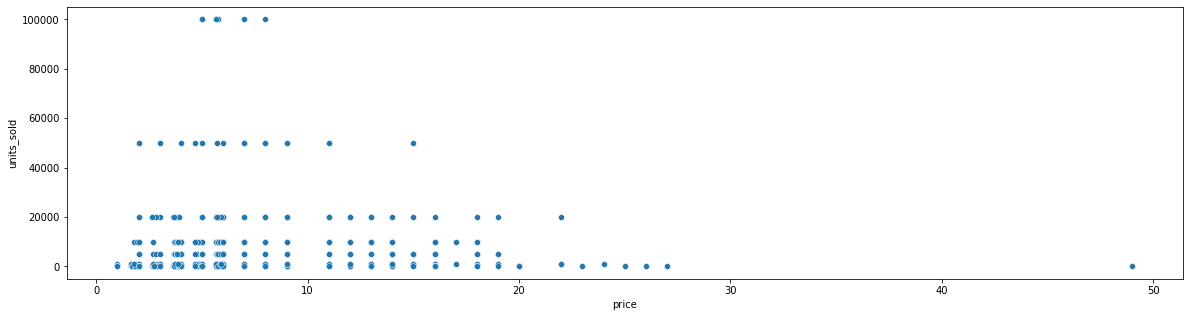

In [58]:
plt.figure(figsize=(20, 5))
sns.scatterplot(x='price', y='units_sold', data=products)

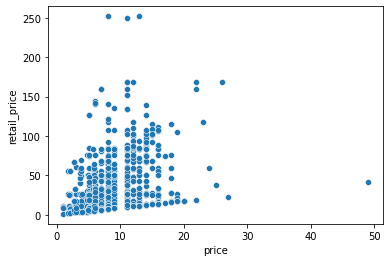

In [46]:
sns.scatterplot(x='price', y='retail_price', data=products)

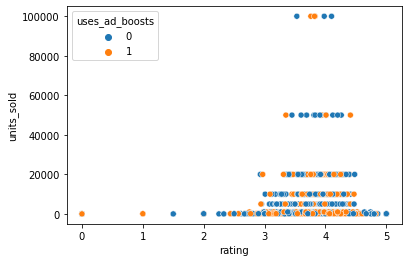

In [47]:
sns.scatterplot(x='rating', y='units_sold', hue='uses_ad_boosts', data=products)

It appears that the best selling items have a rating between 

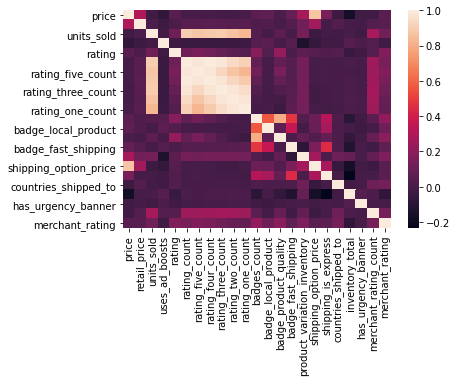

In [48]:
sns.heatmap(products.corr())

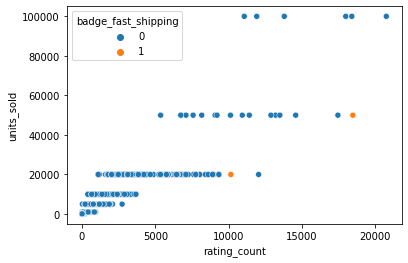

In [49]:
sns.scatterplot(x='rating_count', y='units_sold', hue='badge_fast_shipping', data=products)

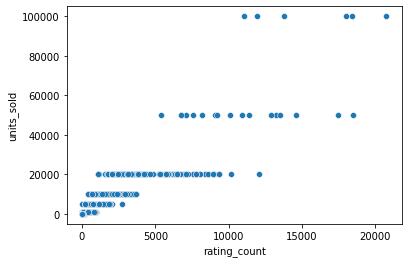

In [51]:
sns.scatterplot(x='rating_count', y='units_sold', data=products)

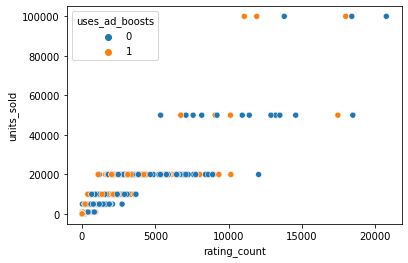

In [59]:
sns.scatterplot(x='rating_count', y='units_sold', hue='uses_ad_boosts', data=products)

# Observation
It appears that units sold is most closely correlated with rating counts. In other words, in general, the more a product is rated, the more it is likely to sell, regardless if the product uses ads or not.

# Todo
Make an interval of price: [0, 10), [10, 30) to see how price affects units sold
(Use pd.cut)

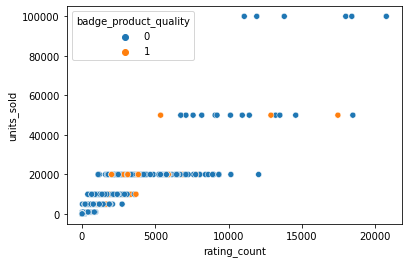

In [52]:
sns.scatterplot(x='rating_count', y='units_sold', hue='badge_product_quality', data=products)

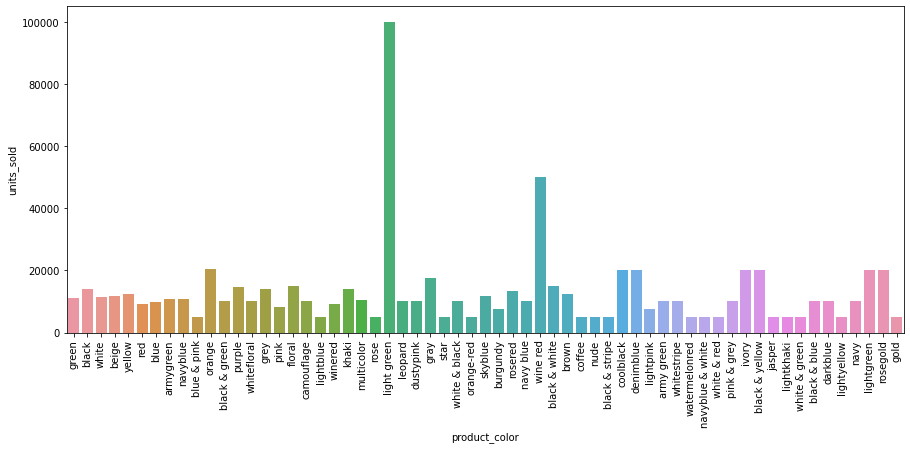

In [53]:
plt.figure(figsize=(15, 6))
plt.xticks(rotation=90)
ax = sns.barplot(x='product_color', y='units_sold',
            data=products[products['units_sold'] > 1000], 
           errwidth=0)
# product_color_gb = products.groupby('product_color')
# product_color_gb.apply(lambda x: x['units_sold'].sum())
# product_color_gb.apply(lambda x: len(x['product_id']))

In [54]:
products.loc[products['product_color'] == 'light green', 'units_sold']

214    100000
Name: units_sold, dtype: int64

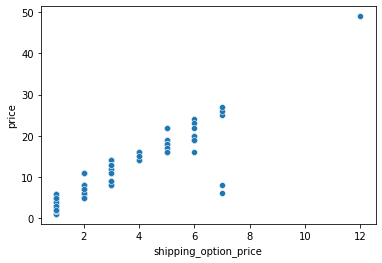

In [55]:
ax = sns.scatterplot(x='shipping_option_price', y='price',
            data=products)